# Fraudlent transactions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading data into a DataFrame
df=pd.read_csv('synth_composite.csv')

In [3]:
df.head(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,211,CASH_OUT,184185.755277,160_2696646_0,203108.476051,18922.720773,160_901564_0,1.019994e+06,1.204127e+06,0,0
1,394,CASH_OUT,237093.196009,160_5585569_0,382707.464238,145614.268230,160_1586945_0,5.870893e+05,8.243203e+05,0,0
2,306,CASH_IN,163600.518794,160_4221372_0,3093.431169,0.000000,160_1701821_0,6.534538e+05,4.901219e+05,0,0
3,235,PAYMENT,7625.866018,160_3064357_0,74630.853812,67004.987793,160_1304279_0,1.666019e+01,1.362096e+01,0,0


In [39]:
df[df.isFraud==1] 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6354407,741,CASH_OUT,2.00,161_8178_0,-71.00,-73.0,161_8134_0,2.700696e+05,2.702828e+05,1,0
6354408,212,CASH_OUT,362998.52,161_2386_0,363050.52,52.0,161_2374_0,2.159733e+06,2.523959e+06,1,0
6354409,568,CASH_OUT,66187.66,161_6282_0,66125.66,-62.0,161_6251_0,7.177089e+05,7.832872e+05,1,0
6354410,15,CASH_OUT,696771.08,161_168_0,696771.08,0.0,161_167_0,3.688858e+05,1.351356e+06,1,0
6354411,501,CASH_OUT,73332.47,161_5584_0,73285.47,-47.0,161_5556_0,1.253682e+05,1.923281e+05,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,483,CASH_OUT,22982.73,161_5384_0,22981.73,-1.0,161_5356_0,3.279893e+06,3.304007e+06,1,0
6362616,214,CASH_OUT,1368390.50,161_2420_0,1368453.50,63.0,161_2408_0,2.589394e+05,1.624944e+06,1,0
6362617,679,CASH_OUT,3150440.28,161_7476_0,3150454.28,14.0,161_7437_0,6.372507e+03,3.157667e+06,1,0
6362618,482,CASH_OUT,75655.33,161_5366_0,75647.33,-8.0,161_5338_0,8.529471e+05,9.285452e+05,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.390056e+02,1.798555e+05,8.338976e+05,7.930853e+05,1.100708e+06,1.225002e+06,1.290820e-03,2.200351e-06
std,1.416541e+02,6.038687e+05,2.888443e+06,2.853683e+06,3.399178e+06,3.674127e+06,3.590480e-02,1.483357e-03
min,1.000000e+00,-7.000000e+00,-9.500000e+01,-1.090000e+02,7.569468e-06,1.262637e-05,0.000000e+00,0.000000e+00
25%,1.530000e+02,1.338835e+04,1.579492e+00,0.000000e+00,1.000945e+01,1.108928e+01,0.000000e+00,0.000000e+00
50%,2.350000e+02,7.486883e+04,1.420658e+04,0.000000e+00,1.327044e+05,2.146617e+05,0.000000e+00,0.000000e+00
75%,3.310000e+02,2.087138e+05,1.073114e+05,4.948253e+04,9.430392e+05,1.111907e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244538e+07,5.958502e+07,4.958503e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.type.value_counts()

CASH_OUT    2237541
PAYMENT     2151630
CASH_IN     1399101
TRANSFER     532919
DEBIT         41429
Name: type, dtype: int64

In [8]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [9]:
df.amount.value_counts()

9.999996e+06    19
9.999990e+06    19
1.000001e+07    18
9.999998e+06    18
1.000000e+07    17
                ..
1.268406e+05     1
1.205129e+06     1
4.080983e+04     1
1.471632e+05     1
4.886421e+06     1
Name: amount, Length: 6362038, dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# Data is highly imbalanced. There is only 0.0012% fraud transactions, while 99.87% transactions are not fraud.

# Data visualization

<AxesSubplot:xlabel='isFraud', ylabel='count'>

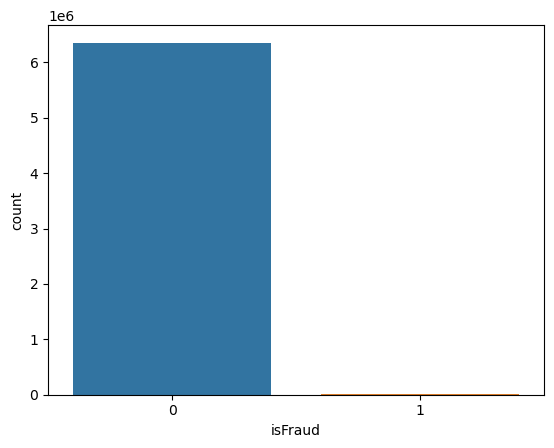

In [12]:
sns.countplot(x=df.isFraud ,data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

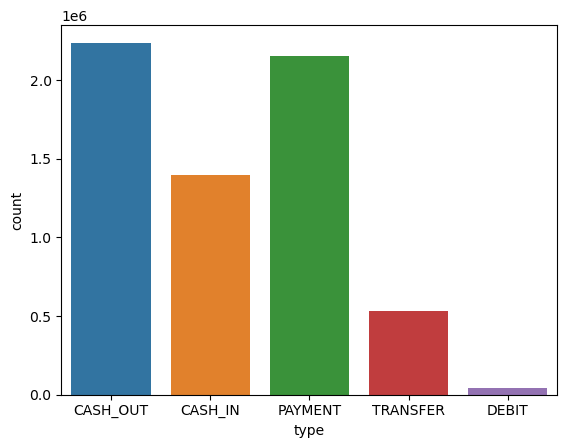

In [13]:
sns.countplot(x=df.type,data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

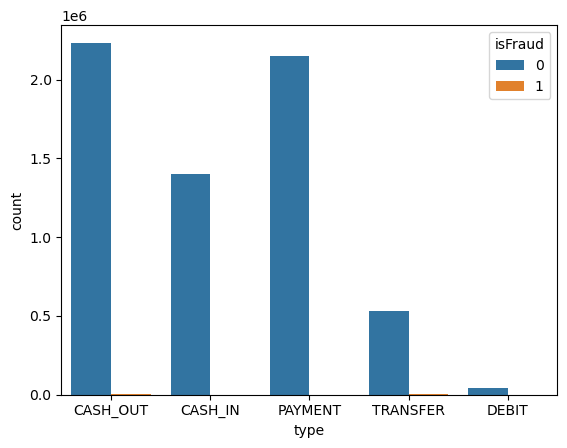

In [14]:
sns.countplot(data=df,x='type',hue='isFraud')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

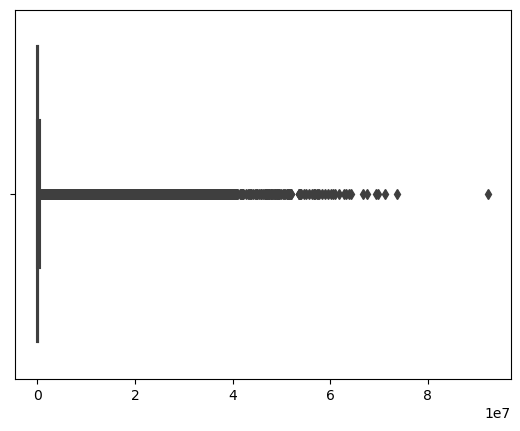

In [15]:
t=df.amount.value_counts().index
sns.boxplot(t)

In [16]:
# There is only 0.0012% fraud transactions, while 99.87% transactions are not fraud.
# Only CASH_OUT and TRANSFER type of transactions have fraus transactions.
# Boxplot shows that there are too many outliers. We will treat the outliers by scaling, later on in the notebook.

In [17]:
correlation = df.corr()

<AxesSubplot:title={'center':'Correlation of Attributes with target variable'}>

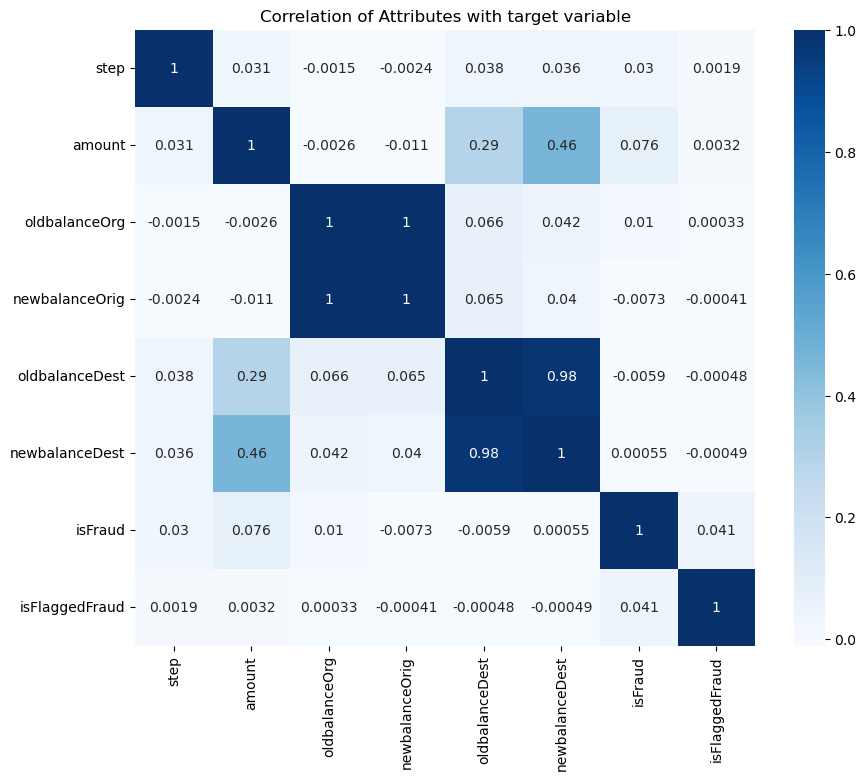

In [18]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with target variable')
sns.heatmap(correlation,annot=True,cmap='Blues')

In [19]:
# There is very high correlation between oldbalanceOrg and newbalanceOrig.
# There is also very high correlation between oldbalanceDest and newbalanceDest.
# There is multi-collinearity.

# Since they are so highly correlated features, dropping one of them is the a good way to go forward,
# as keeping both of them will lead to undesirable results.

# data preprocessing

For the training data, which is extensive, we selectively extract only 2000 lines.

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [142]:
df_1=df[df.isFraud==1]
df_0=df[df.isFraud==0]
df_0=df_0[:15000]
df_1=df_1[:15000]

In [143]:
df_new=pd.concat([df_0,df_1],axis=0)

In [144]:
X=df_new.drop(['isFraud'],axis=1)
y=df_new.isFraud

In [145]:
X.shape

(23213, 10)

In [146]:
y.unique()

array([0, 1], dtype=int64)

In [147]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
X_train

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
6293,41,CASH_OUT,4.155564e+04,160_850321_0,1.555070e+04,0.0,160_65816_0,2.016484e+06,2.057991e+06,0
1162,203,TRANSFER,3.548188e+06,160_2446908_0,1.102044e+00,0.0,160_41764_0,4.303366e+06,8.725848e+06,0
6664,378,CASH_OUT,3.426570e+05,160_5428091_0,1.816918e+00,0.0,160_696765_0,1.621024e+06,1.963802e+06,0
11012,41,PAYMENT,9.511795e+03,160_2013952_0,5.894687e-01,0.0,160_857336_0,6.320222e+00,8.334986e+00,0
8139,187,PAYMENT,9.412256e+03,160_75234_0,1.766312e+00,0.0,160_40431_0,1.284054e+01,1.052505e+01,0
...,...,...,...,...,...,...,...,...,...,...
11964,131,PAYMENT,9.582888e+03,160_2633585_0,5.509212e-01,0.0,160_1119322_0,1.092903e+01,1.223483e+01,0
6360982,350,TRANSFER,8.357618e+05,161_5967_0,8.357018e+05,-60.0,161_5938_0,1.923122e+03,4.899847e+03,0
5390,138,CASH_OUT,3.183198e+05,160_1363263_0,7.112720e+04,0.0,160_564338_0,1.496981e+01,1.460358e+05,0
860,330,CASH_OUT,1.111888e+05,160_4633625_0,1.518211e+04,0.0,160_1701465_0,1.905581e+05,3.018272e+05,0


In [149]:
X_test.shape

(4643, 10)

In [150]:
#define numeric and categorical features
numer_fea=[]
categ_fea=[]
for col in X.columns:
    if df[str(col)].dtypes=="float64" or df[str(col)].dtypes=='int64':
        numer_fea.append(col)
    else:
        categ_fea.append(col)

In [151]:
#numer_fea
categ_fea

['type', 'nameOrig', 'nameDest']

In [152]:
# Numeric transformer pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Categorical transformer pipeline
catego_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label', OneHotEncoder(handle_unknown='ignore'))
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numer_fea),
        ('cat', catego_transformer, categ_fea)
    ],
    remainder='passthrough'
)
from sklearn.feature_selection import f_classif
# Feature selection
trf4 = SelectKBest(score_func=f_classif, k=5)

trf5 = RandomForestClassifier(n_estimators=100, class_weight='balanced')

# Create pipeline
pipe = make_pipeline(preprocessor, trf4, trf5)


In [153]:
# Fit the pipeline on training data
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['step', 'amount',
                                                   'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'isFlaggedFraud']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('label',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['type', 'nameOrig',
                                                   'nameDest'])])),
                ('selectkbest', SelectKBest(k=5)),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced'))])

In [154]:
# Access the feature selection transformer (assuming 'trf4' is the name you assigned)
feature_selection_transformer = pipe.named_steps['selectkbest']

# Access specific information about the transformer
feature_selection_transformer.get_params()


{'k': 5,
 'score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [155]:
from sklearn import set_config
set_config(display='diagram')

In [156]:
# Cross-validation
cv_scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

Cross-validation scores: [0.93322563 0.91383953 0.92137857 0.91976306 0.91276252 0.908993
 0.92514809 0.92299408 0.92837911 0.91922456]
Mean CV score: 0.9205708131394722
Standard deviation of CV scores: 0.007009852550473087


In [157]:
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [158]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9213870342451002

# data evaluation

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [160]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9213870342451002


In [161]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2806,  179],
       [ 186, 1472]], dtype=int64)

In [162]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9213870342451002
Precision: 0.8915808600847971
Recall: 0.887816646562123
F1 Score: 0.9213499176587064


In [163]:
# We can clearly see that the above model with the imbalanced data is not good. The accuracy might be 99.8%, and the
# Recall is only 88%.